<a href="https://colab.research.google.com/github/Danjstr/Fasting-Blood-Sugar/blob/main/D_Strauss_FinalProject(3)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project


## Abstract

Research Question: Can we effectively predict if Fasting Blood Sugar is over 120 mg/dl (milligrams per liter ) for heart attack patients with a Model performance, Precision, Accuracy, Recall, and F1-score of over 80%?

Answer: Yes, we can effectively predict if Fasting Blood Sugar is over 120 mg/dl for heart attack patients with Precision, Accuracy, Recall, and F1-score of over 80%. In fact, using our ensemble model we reach almost 90%.

During the process of this build, we had variables in our data preparation section that needed to be dropped and replaced using k-nearest neighbor. Depending on our run either the second or third XG Boosted classifier performs the best out of our twelve models. Our XG Boosted model performed modestly well on the X_test data and our Ensemble model outperformed all our other models.


## Introduction


Our health plays an important role in our daily life. People spend their lives struggling over diets and exercise schedules. 

Heart Disease remains the No. 1 cause of death in the US, and accounted for approximately 365,744 deaths in 2018.

Today, the average American consumes almost 152 pounds of sugar in one year

The effects of added sugar intake — higher blood pressure, inflammation, weight gain, diabetes, and fatty liver disease — are all linked to an increased risk for heart attack..

For the project, I will be answering one main question.

Goal: After finishing the analysis, we are going to build a series of predictive models to find out how effectively blood sugar over the 120 mg/dl can be predicted for heart attack patients by building models using our provided explanatory variables. What is the Highest Model performance, Precision, Accuracy, Recall, and F1-score we can achieve using a limited data set with just 303 observations?

Question: Can we effectively predict if Fasting blood sugar is over 120 mg/dl (milligrams per liter ) for heart attack patients with a Model performance, Precision, Accuracy, Recall, and F1-score of over 80%?

Note: Fasting Blood Sugar is a measure of blood sugar after an overnight fast. A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.

"The result of our research will show us how much of an influence blood sugar levels over 120 mg/dl play in the cause of a heart attack. If we can reach a performance rate of over 80% this means we can with 80% accuracy tell a heart attack patient that their blood sugar level was a contributing factor for their heart attack.

Data to be Used (4 Points)

The Data we use will be collected from the Kaggle website. https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

The data from this source is listed as public and may be used by anyone. The datasets owner and maintainer is Rashik Rahman and it contains 303 observations. The whole dataset contains 14 columns.


-  The response variable is fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).

- Age : Age of the patient (Continous)

- Sex : Sex of the patient (Categorical)

- exang: exercise induced angina (1 = yes; 0 = no) (Categorical)

Note: A type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease.

- ca: number of major vessels (0-3) (Categorical)

- cp: Chest Pain type (Categorical)

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

- trtbps : resting blood pressure (in mm Hg) (continuousl)

- chol : cholestoral in mg/dl fetched via BMI sensor (continuous)

- rest_ecg : resting electrocardiographic results (Categorical)

Note: 
The three major types of ECG are: resting ECG – you lie down for this type of ECG. No movement is allowed during the test, as electrical impulses generated by other muscles may interfere with those generated by your heart. This type of ECG usually takes 5 to 10 minutes.

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach: maximum heart rate achieved (continuous)

Note: A normal resting heart rate for adults ranges from 60 to 100 beats per minute. As we are dealing with heart attack patients in this dataset heart rates will likely be well over this range.

- target: 0= less chance of having another heart attack 1= more chance of receiving another heart attack (Categorical)

- thall: Thal rate - Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen. Thalassemia can cause anemia, leaving you fatigued. (Categorical)

Note: thal: thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

- oldpeak: Previous peak

Note: Ranges from 0 to over 6. If the value is less than 2 the patient is low risk. If the value is between 2 and 4 the patient is at significant risk. If it is over 4 the patient is at terrible risk. (continuous)

- slp: Slope

Note: The slope of the peak exercise ST segment (Value 0: upsloping, Value 1: flat, Value 2: downsloping) (Categorical)

### Approach

Our data is a CSV file from the Kaggle website, so we can directly download it and store it in a data frame. Before we start building models, we will do some basic exploratory data analysis(EDA) and data preparation work. We plan to use the histogram, Box plot, scatter plot, bar chart, pair plot, and other graphics for visual analysis. Through the EDA process, we can also apply our domain knowledge of feature selection to provide us at least five explanatory variables for building models.

Our response variable is categorical, we will construct at least four different models: Decision Tree, XG Boosted, KNN, and Random forest. We will use the confusion matrix including accuracy, precision, recall, f1-score, and support to compare their performance. At last, we are also going to construct our ensemble models. 

For the ensembling model, we plan to use Stacking. 

Finally, we will give a summary of our findings and make our conclusion of the research project. 

## Exploratory Data Analysis

In [ ]:
#import dependencies
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import MultipleLocator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import sklearn.metrics as metrics
from scipy import stats


We start by importing all necessary dependencies. Downloading our data which is available via the raw GitHub link in the code below. Then we perform some basic EDA. 

In [ ]:
#import dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/Danjstr/DAV-6150/main/heart.csv')


In [ ]:
df.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.tail(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no missing values which mean we don't have to waste time on imputation. There are also no inappropriate negative or zero values. Nor do there appear to be any '?' or '0' where they are not supposed to be. At a glance, it seems like a fairly clean dataset that requires little to no data preparation. Let's dig deeper.

In [ ]:
#Show the count of all negative values
df[df < 0].count()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Good we don't Have any negative values to worry about.

In [ ]:
#Show the count of all values that equal zero
df[df == 0].count()

age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         258
restecg     147
thalach       0
exang       204
oldpeak      99
slope        21
ca          175
thal          2
target      138
dtype: int64

So a lot of our variables are categorical and have been preprocessed into dummy variables by the person who provided the dataset. So we should expect to see a large number of zeros for the following variables that are listed as categorical.

First, we should note that there is clearly mislabeled data in the 'thall' column. The thall coloumn is supposed to range between 1 and 3. There are not supposed to be any 0 values in this column. We will need to handle these two inappropriate 0 values in the data preparation section.

Note:  2 = normal; 1 = fixed defect; 3 = reversable defect



fbs: (Categorical)

Age : (Continous)

Sex : (Categorical)

exang: (Categorical)

ca: (Categorical)

cp :  (Categorical)

trtbps :  (continuous)

chol :  (continuous)

rest_ecg :  (Categorical)

thalach :(continuous)

target : (Categorical)

thall: (Categorical)

oldpeak: Previous peak (continuous)

Slope: (Categorical)

In [ ]:
#Show the count of all values that equal one
df[df == 1].count()

age           0
sex         207
cp           50
trestbps      0
chol          0
fbs          45
restecg     152
thalach       0
exang        99
oldpeak      14
slope       140
ca           65
thal         18
target      165
dtype: int64

In [ ]:
#Show the count of all values that equal two
df[df == 2 ].count()

age           0
sex           0
cp           87
trestbps      0
chol          0
fbs           0
restecg       4
thalach       0
exang         0
oldpeak       9
slope       142
ca           38
thal        166
target        0
dtype: int64

In [ ]:
#Show the count of all values that equal three
df[df == 3 ].count()

age           0
sex           0
cp           23
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       5
slope         0
ca           20
thal        117
target        0
dtype: int64

In [ ]:
#Show the count of all values that equal four
df[df == 4 ].count()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     3
slope       0
ca          5
thal        0
target      0
dtype: int64

We should note that there is clearly more mislabeled data in the 'ca' column. The 'ca' column is supposed to range between 0 and 3. There are not supposed to be any 4 values in this column. We will need to handle these five inappropriate 4 values in the data preparation section.


In [ ]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

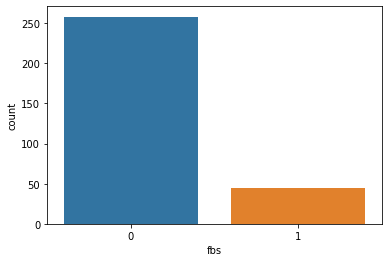

In [ ]:
sns.countplot(x="fbs", data=df)

So for our Response variable, we can see that there is a significantly larger number of occurrences where fasting blood sugar is not over 120mg/dl when compared to the number of occurrences where it is over 120mg/dl. This class and the class imbalance of any other variable will be dealt with in the modeling section.

In [ ]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

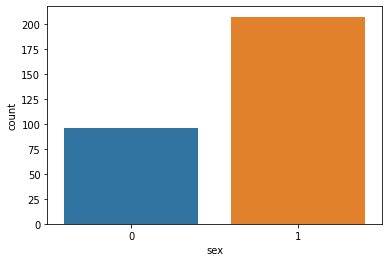

In [ ]:
sns.countplot(x="sex", data=df)

There is a larger number of male patients that had heart attacks in our data set when compared to female patients. This can be a result of sampling bias or a result of males being more prone to heart attacks.

In [ ]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

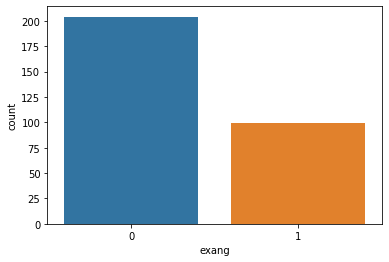

In [ ]:
sns.countplot(x="exang", data=df)

There are roughly twice as many patients who did not experience exercise-induced angina. When compared to the number of patients that did experience exercise-induced angina.

Note: Angina means pain.

In [ ]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

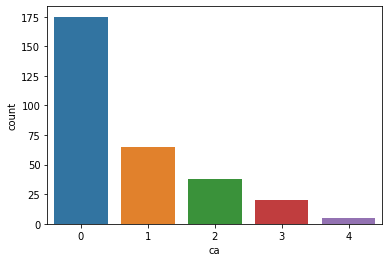

In [ ]:
sns.countplot(x="ca", data=df)

It seems most patients had no major vessels involved in their heart attack. A little over fifty had 1 major vessel involved in the heart attack. Less than 50 for two vessels. and roughly 25 for all three major vessels playing a role in the patient's heart attack.

Here again, we see the anomaly in our data that we will have to deal with in the data preparation section. "ca" is meant to range between 0 and 3 as such the 5 variables labeled 4 will need to be dealt with.

In [ ]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

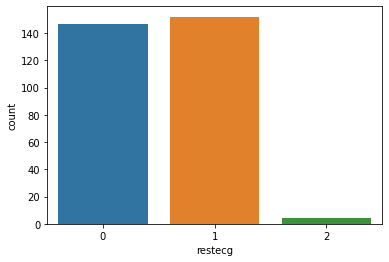

In [ ]:
sns.countplot(x="restecg", data=df)

We see there are about as many patients that have normal results on their ECG when compared to the number of patients who have ST-T wave abnormality. There are only four patients that show signs of left ventricular hypertrophy.

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

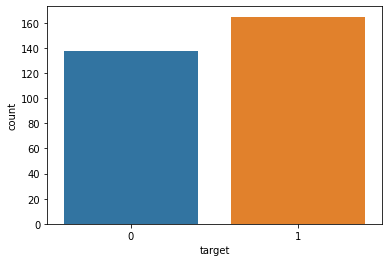

In [ ]:
sns.countplot(x="target", data=df)

There are fewer patients that are expected not to have another heart attack. Compared to the number that are expected to have a heart attack, although the diffrence is modest.

In [ ]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

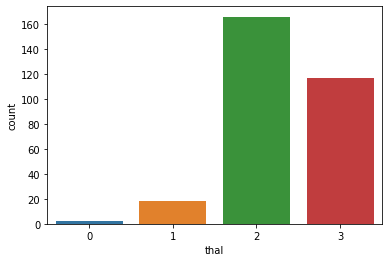

In [ ]:
sns.countplot(x="thal", data=df)

As we mentioned earlier 0 is not supposed to be a value in 'thal' column and will be dealt with in the data preparation section. 

As we can see here the majority of patients have a normal thal rate.  There are over a hundred of them that have reversible defects. While nearly 20 have permanent defects.

1 = fixed defect; 2 = normal; 3 = reversable defect

Reminder: The 'thal' variable is a categorical measure of the defects of a that was born with the blood defect Thalassemia.

In [ ]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

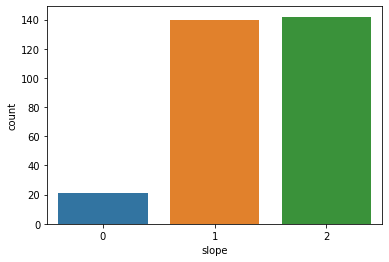

In [ ]:
sns.countplot(x="slope", data=df)

There are not so many instances of upsloping only 20 or so. There are about as many patients who experience downsloping and flat results. 

Note: Upsloping indicates increased risk. Flat indicates stable risk levels while downsloping indicates decreased risk levels.

As noted earlier many of our categorical variables seem to suffer from class imbalances. This will be dealt with in the modeling section.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7940831dd0>,
      dtype=object)

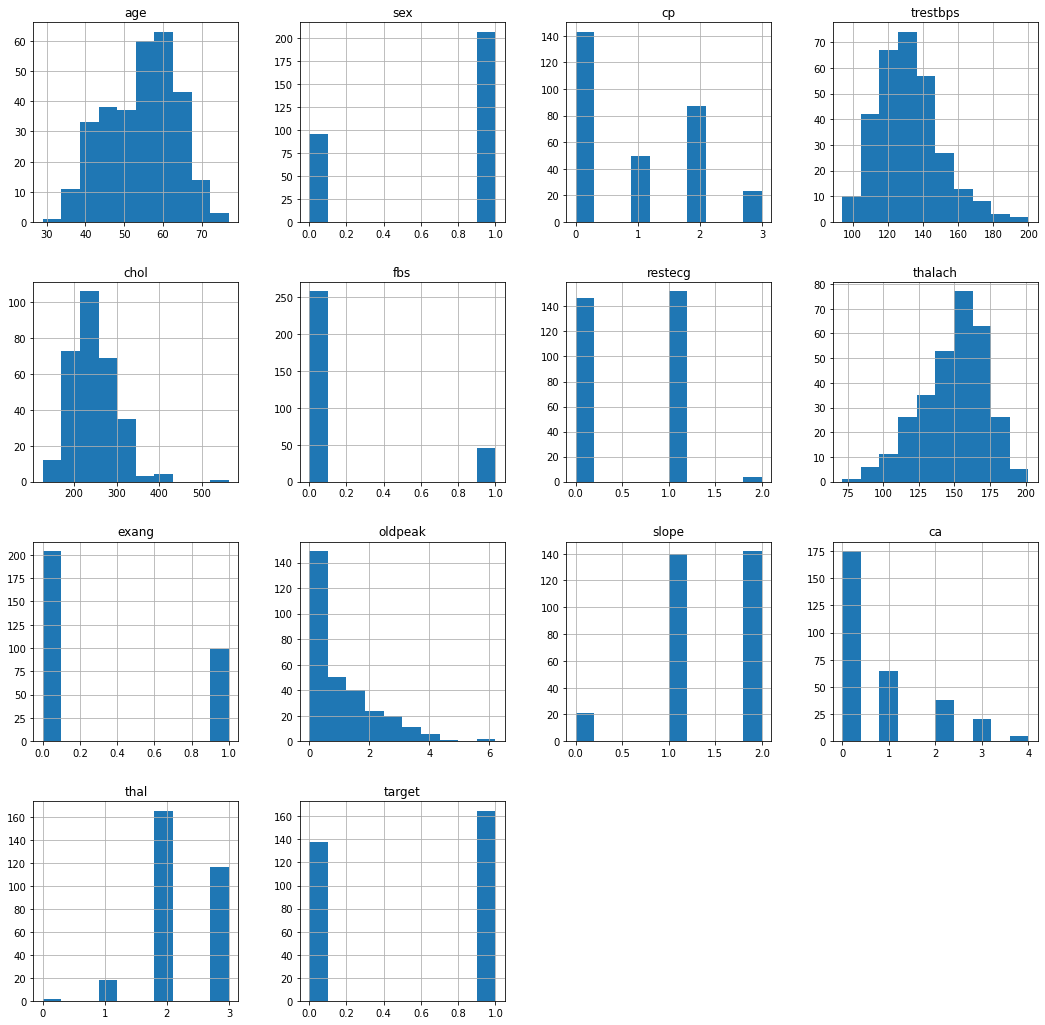

In [ ]:
df.hist(figsize=(18,18))

Text(0.5, 1.0, 'age')

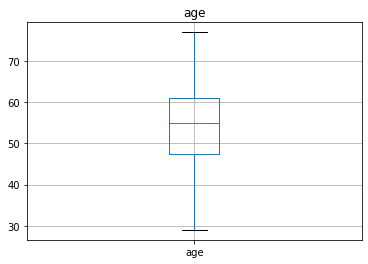

In [ ]:
df.boxplot(column=['age'], return_type='axes');
plt.title("age")

Text(0.5, 1.0, 'trestbps')

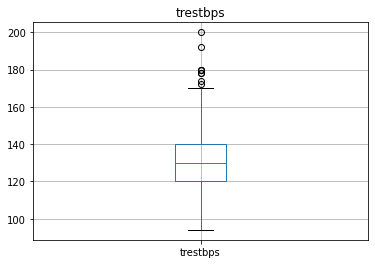

In [ ]:
#Resiting Blood Preasure
df.boxplot(column=['trestbps'], return_type='axes');
plt.title("trestbps")

Text(0.5, 1.0, 'chol')

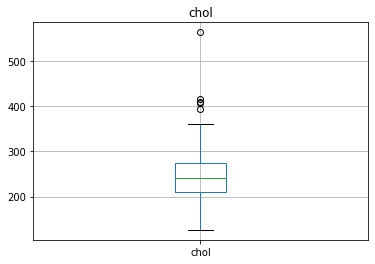

In [ ]:
df.boxplot(column=['chol'], return_type='axes');
plt.title("chol")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'thalach')

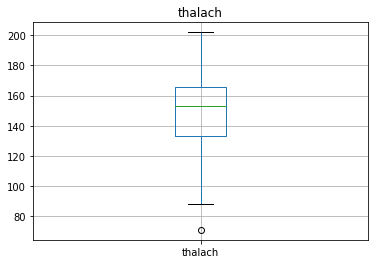

In [ ]:
#Maximum Hear Rate
df.boxplot(column=['thalach'], return_type='axes');
plt.title("thalach")

Text(0.5, 1.0, 'oldpeak')

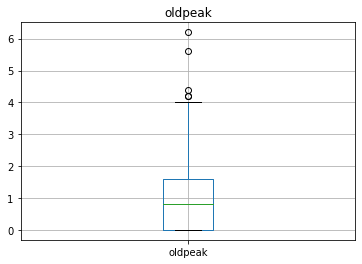

In [ ]:
df.boxplot(column=['oldpeak'], return_type='axes');
plt.title("oldpeak")

When it comes to our continuous variables we see interesting distributions.

The age of patients who experienced heart attacks is roughly normal and is mostly distributed between people in their early 30's and late 60's.

Resting blood pressure largely ranges between 100 and 160. with a slight tail of resting blood pressure levels up to 200.

Cholesterol levels in patients range from roughly 150mg/dl to below 400mg/dl. Normal levels should not exceed 200mg/dl. It has a large right tail indicating there might be an outlier. There does seem to be a single outlier in the cholesterol levels that is 100mg/dl higher than any other value. In another scenario, it might be wise to remove this data point or perform a transformation to reduce its impact. However, a high cholesterol level is a known cause of heart attacks. As the data we are working with is of heart attack patients it is likely a valid if slightly extreme data point.

The maximum heart rate achieved ranges between 100bpm and 200bpm. A normal healthy heart rate is between 60 and 100 bpm.

The old peak of exercise-induced ST Depression Ranges between 0 and over 6. The lower the value the lower the risk of the patient. the higher the value the higher the risk of the patient. We can see this distribution is largely right-tailed. This indicates that as risk increases fewer patients fall into that risk level.

### Relationship


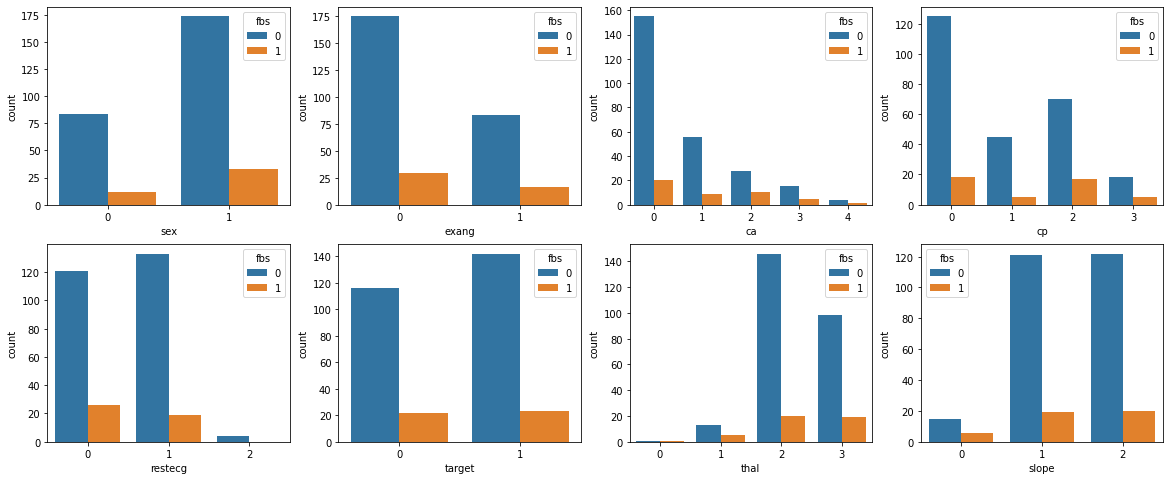

In [ ]:
#Relationship of categorical and Fasting Blood Sugar 
fig, axes =plt.subplots(2,4, figsize=(20,8)) 
axes = axes.flatten()
cat = ['sex' , 'exang', 'ca', 'cp','restecg', 'target', 'thal', 'slope']
for ax, countplot in zip(axes, df.dtypes[cat].index):
    sns.countplot(x=countplot,hue='fbs', data=df, ax=ax) 
plt.show()

The relationships between the response variable 'Fasting Blood Sugar' and the other categorical variables can be seen here. These graphs highlight the class imbalance in the response variable. But, we already know that is an issue we will deal with it later in the modeling section.

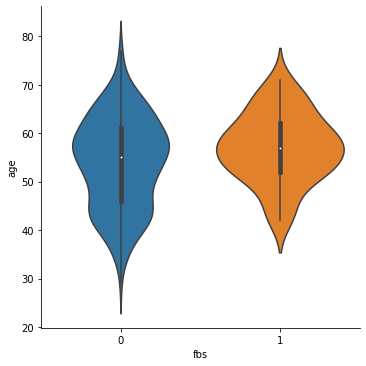

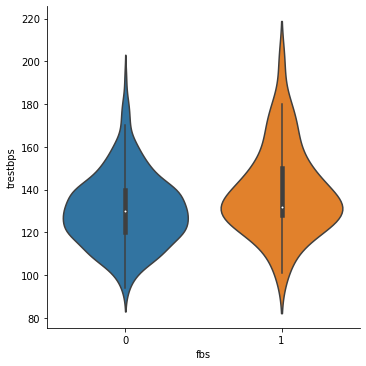

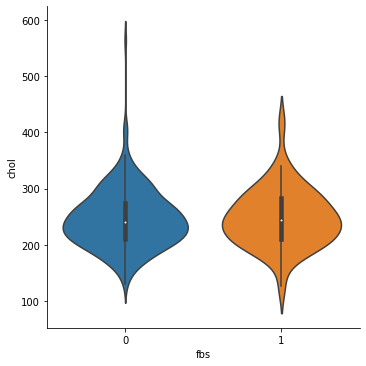

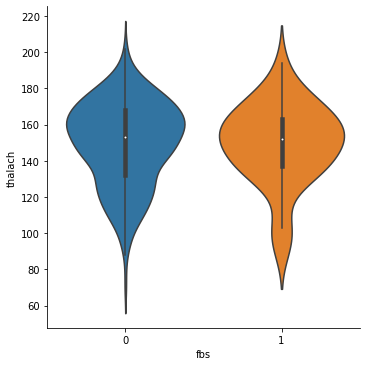

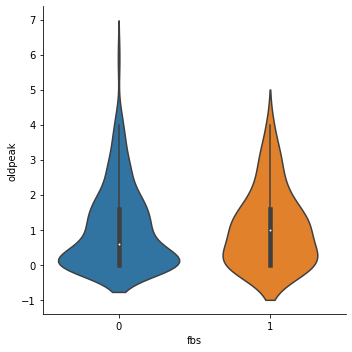

In [ ]:
#Relationship of continuous and Fasting Blood Sugar 
cont = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
for ax, boxplot in zip(axes, df.dtypes[cont].index): 
    sns.catplot(x="fbs", y=boxplot, kind=("violin"), data=df)
plt.tight_layout()  
plt.show()

The relationships between the response variable 'Fasting Blood Sugar' and the other continuous numerical variables can be seen here. These violin plots demonstrate that the distributions of our continuous variables remain largely the same for Fasting Blood Sugar levels over 120 milligrams per litter and those under 120 milligrams per liter.

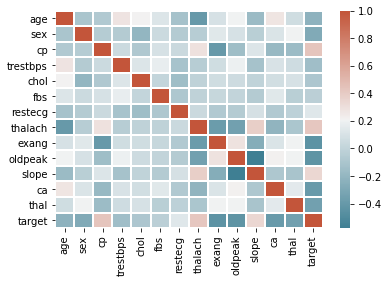

In [ ]:
#plot the heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))

A quick look at the correlation Heatmap shows us that next to none of our numerical or categorical variables are correlate. This means all of the numerical variables have value for predictive purposes. As we are working with a small dataset with just 303 observations. It may be best to avoid removing any of the continuous numerical variables during feature selection. 



The Cor

## Data Preperation

For the data preparation section, we will be dealing with two issues.

First, we will be dealing with the 2 mislabeled rows in the "thal" column. As we discussed in our EDA there should only be 3 possible entries for the "thal" column. 1, 2, and 3. 0 is not a valid entry.

Second, we will be dealing with the 5 values in the "ca" column that are labeled 4. The "ca" column is meant to range between 0 and 3. 


In [ ]:
df1 = df.copy(deep = True)

In [ ]:
#Replace errors with with nan.
df1['thal'].replace(0, np.NaN, inplace=True)
df1['ca'].replace(4, np.NaN, inplace=True)

We drop the mislabeled data from both columns and replace them with NaN so that we can perform data imputation.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        298 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

Good, we have turned the 0's in the "thal" column and the 4's in the "ca" column into NaN's. Now we have to fill them using the proper imputation methods. If we were working with more data, even a few thousand rows. then, dropping these rows would be the easiest solution. As it is, we only have 303 valid rows of data and it isn't wise to remove any of it. So we will be using sklearns kNNImputer to resolve this issue and fill in the missing values.

In [ ]:
#Perform K-nearest neighbors imputation
imputer = KNNImputer(n_neighbors=3)
df2 = imputer.fit_transform(df1[['age', 'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal',	'target']])

In [ ]:
df2 = pd.DataFrame(df2, columns=['age', 'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal',	'target'])

In [ ]:
df2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df2.tail(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
253,67.0,1.0,0.0,100.0,299.0,0.0,0.0,125.0,1.0,0.9,1.0,2.0,2.0,0.0
254,59.0,1.0,3.0,160.0,273.0,0.0,0.0,125.0,0.0,0.0,2.0,0.0,2.0,0.0
255,45.0,1.0,0.0,142.0,309.0,0.0,0.0,147.0,1.0,0.0,1.0,3.0,3.0,0.0
256,58.0,1.0,0.0,128.0,259.0,0.0,0.0,130.0,1.0,3.0,1.0,2.0,3.0,0.0
257,50.0,1.0,0.0,144.0,200.0,0.0,0.0,126.0,1.0,0.9,1.0,0.0,3.0,0.0
258,62.0,0.0,0.0,150.0,244.0,0.0,1.0,154.0,1.0,1.4,1.0,0.0,2.0,0.0
259,38.0,1.0,3.0,120.0,231.0,0.0,1.0,182.0,1.0,3.8,1.0,0.0,3.0,0.0
260,66.0,0.0,0.0,178.0,228.0,1.0,1.0,165.0,1.0,1.0,1.0,2.0,3.0,0.0
261,52.0,1.0,0.0,112.0,230.0,0.0,1.0,160.0,0.0,0.0,2.0,1.0,2.0,0.0
262,53.0,1.0,0.0,123.0,282.0,0.0,1.0,95.0,1.0,2.0,1.0,2.0,3.0,0.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [ ]:
df2['ca'].value_counts()

0.000000    177
1.000000     65
2.000000     38
3.000000     20
0.666667      2
1.666667      1
Name: ca, dtype: int64

In [ ]:
df2['thal'].value_counts()

2.000000    167
3.000000    117
1.000000     18
2.666667      1
Name: thal, dtype: int64

In [ ]:
#Round the result of the imputation to whole numbers
df2['ca'] = df2['ca'].round(0)
df2['thal'] = df2['thal'].round(0)

The returned values for our imputation with K-nearest neighbor are not all whole numbers. So we will simply round the results to the nearest whole number to resolve the issue.

In [ ]:
df2['ca'].value_counts()

0.0    177
1.0     67
2.0     39
3.0     20
Name: ca, dtype: int64

In [ ]:
df2['thal'].value_counts()

2.0    167
3.0    118
1.0     18
Name: thal, dtype: int64

In [ ]:
#Change column types to Int64
df2['age']=df2['age'].astype('Int64')
df2['sex']=df2['sex'].astype('Int64')
df2['cp']=df2['cp'].astype('Int64')
df2['trestbps']=df2['trestbps'].astype('Int64')
df2['chol']=df2['chol'].astype('Int64')
df2['fbs']=df2['fbs'].astype('Int64')
df2['restecg']=df2['restecg'].astype('Int64')
df2['thalach']=df2['thalach'].astype('Int64')
df2['exang']=df2['exang'].astype('Int64')
df2['slope']=df2['slope'].astype('Int64')
df2['ca']=df2['ca'].astype('Int64')
df2['thal']=df2['thal'].astype('Int64')
df2['target']=df2['target'].astype('Int64')

Here we are just confirming that all our variables are 'Int64' with the exception of the variable 'oldpeak'.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    Int64  
 1   sex       303 non-null    Int64  
 2   cp        303 non-null    Int64  
 3   trestbps  303 non-null    Int64  
 4   chol      303 non-null    Int64  
 5   fbs       303 non-null    Int64  
 6   restecg   303 non-null    Int64  
 7   thalach   303 non-null    Int64  
 8   exang     303 non-null    Int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    Int64  
 11  ca        303 non-null    Int64  
 12  thal      303 non-null    Int64  
 13  target    303 non-null    Int64  
dtypes: Int64(13), float64(1)
memory usage: 37.1 KB


In [ ]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Prepped Data Review

Bellow is the prepped Data Review of our dataset. Its distributions and counts are largely the same as in our EDA. The few differences would occur in the distributions and counts related to the 'thal' and 'ca' columns.

In [ ]:
df=df2.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    Int64  
 1   sex       303 non-null    Int64  
 2   cp        303 non-null    Int64  
 3   trestbps  303 non-null    Int64  
 4   chol      303 non-null    Int64  
 5   fbs       303 non-null    Int64  
 6   restecg   303 non-null    Int64  
 7   thalach   303 non-null    Int64  
 8   exang     303 non-null    Int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    Int64  
 11  ca        303 non-null    Int64  
 12  thal      303 non-null    Int64  
 13  target    303 non-null    Int64  
dtypes: Int64(13), float64(1)
memory usage: 37.1 KB


In [ ]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: Int64

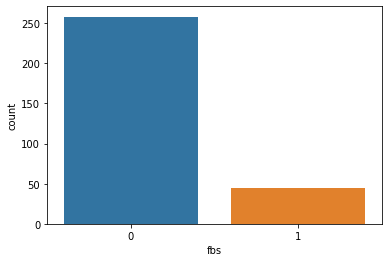

In [ ]:
sns.countplot(x="fbs", data=df)

So for our Response variable we can see that the count remains the same there is still a significantly larger number of occurrences where fasting blood sugar is not over 120mg/dl when compared to the number of occurrences where it is over 120mg/dl.

In [ ]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: Int64

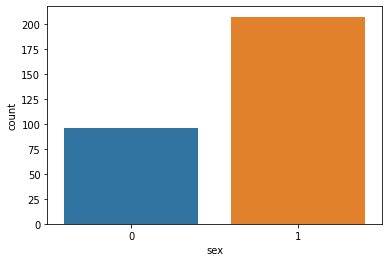

In [ ]:
sns.countplot(x="sex", data=df)

For sex, the count remains the same there is a larger number of male patients that had heart attacks when compared to female patients. This can be a result of sampling bias or a result of males being more prone to heart attacks.

In [ ]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: Int64

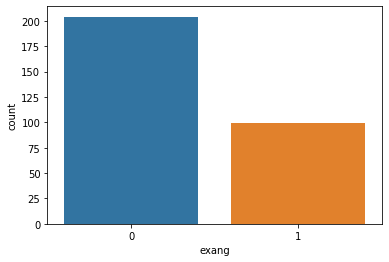

In [ ]:
sns.countplot(x="exang", data=df)

The count of patients who experience exercise-induced angina remains the same. 

In [ ]:
df['ca'].value_counts()

0    177
1     67
2     39
3     20
Name: ca, dtype: Int64

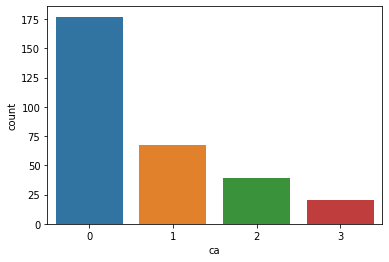

In [ ]:
sns.countplot(x="ca", data=df)

The count of patients that had a major vessel impact their heart attack remains almost the same. The one key difference is that there are no values labeled 4. All values labeled 4 have been replaced using a k-nearest neighbor. 

In [ ]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: Int64

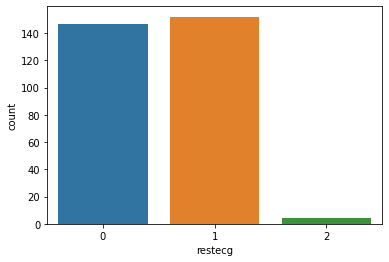

In [ ]:
sns.countplot(x="restecg", data=df)

The count of the number of patients that have normal results on their ECG when compared to the number of patients who have ST-T wave abnormality remains the same. Again, there are only four patients that show signs of left ventricular hypertrophy.

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: Int64

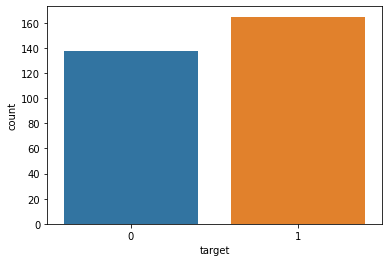

In [ ]:
sns.countplot(x="target", data=df)

The count of the number of patients that are expected not to have another heart attack remains the same.

In [ ]:
df['thal'].value_counts()

2    167
3    118
1     18
Name: thal, dtype: Int64

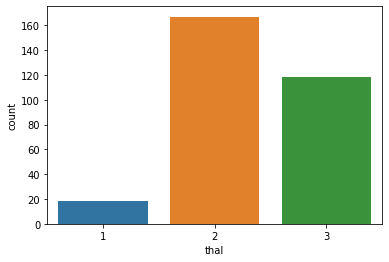

In [ ]:
sns.countplot(x="thal", data=df)

The count of the overall 'thal' rates remains the same. As we can see here the majority of patients have a normal thal rate (2).  Over a hundred of them have reversible defects (3). While nearly 20 have permanent defects (1). The only serious difference is that there are no values labeled 0. As those were inappropriately labeled values that have been replaced with k-nearest neighbor.

In [ ]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: Int64

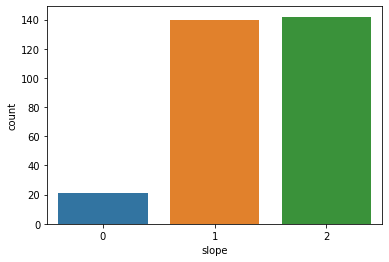

In [ ]:
sns.countplot(x="slope", data=df)

The count of the number of  instances of uplsoaping vs Downsloaping remain the same.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79348bfd10>,
      dtype=object)

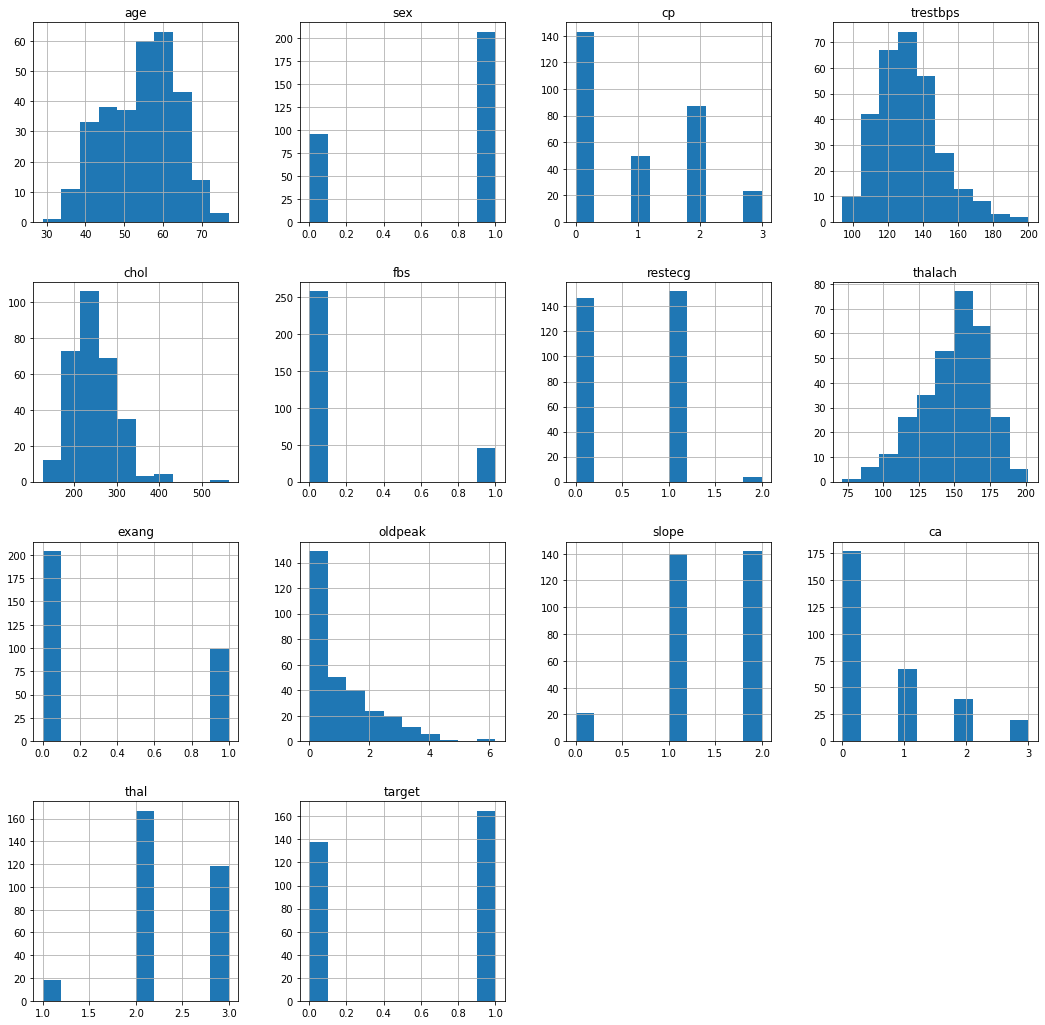

In [ ]:
df.hist(figsize=(18,18))

Text(0.5, 1.0, 'age')

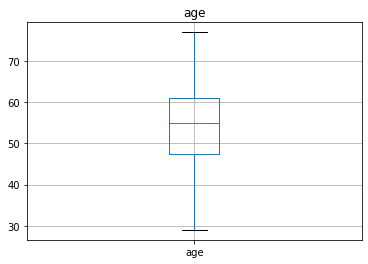

In [ ]:
df.boxplot(column=['age'], return_type='axes');
plt.title("age")

Text(0.5, 1.0, 'trestbps')

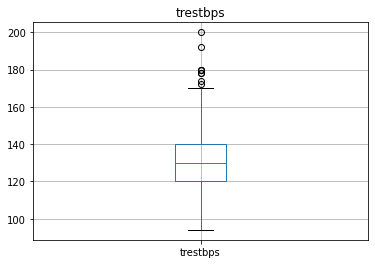

In [ ]:
df.boxplot(column=['trestbps'], return_type='axes');
plt.title("trestbps")

Text(0.5, 1.0, 'chol')

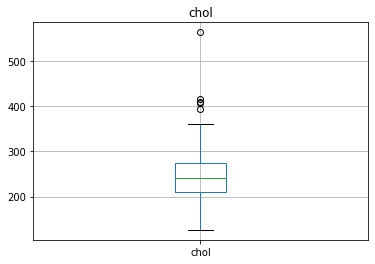

In [ ]:
df.boxplot(column=['chol'], return_type='axes');
plt.title("chol")

Text(0.5, 1.0, 'thalach')

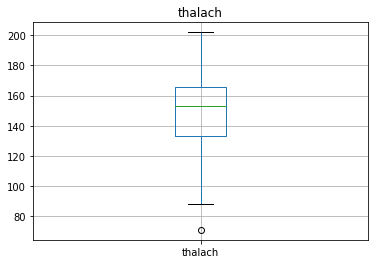

In [ ]:
df.boxplot(column=['thalach'], return_type='axes');
plt.title("thalach")

Text(0.5, 1.0, 'oldpeak')

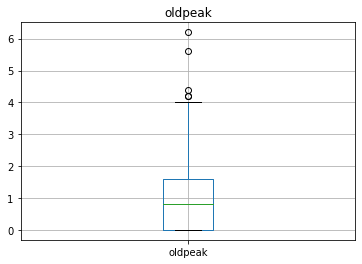

In [ ]:
df.boxplot(column=['oldpeak'], return_type='axes');
plt.title("oldpeak")

When it comes to our continuous variables we see the distributions appear largely the same. There have been no serious changes to the distribution of these values. As there were no changes to the numeric values during the data preparation stage.

### Relationship


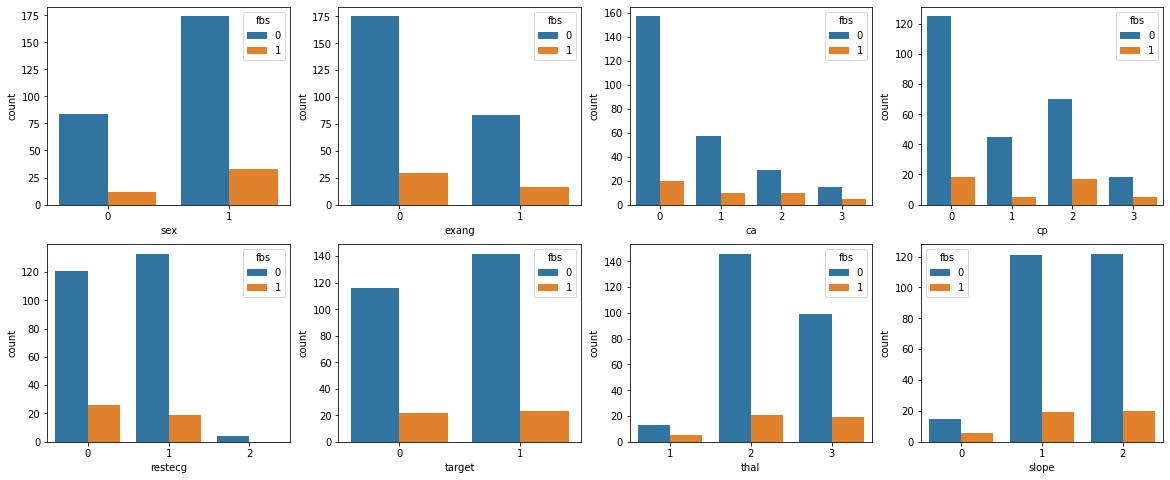

In [ ]:
#Relationship of categorical data 
fig, axes =plt.subplots(2,4, figsize=(20,8)) 
axes = axes.flatten()
cat = ['sex' , 'exang', 'ca', 'cp','restecg', 'target', 'thal', 'slope']
for ax, countplot in zip(axes, df.dtypes[cat].index):
    sns.countplot(x=countplot,hue='fbs', data=df, ax=ax) 
plt.show()

When comparing our categorical variables with our response variable we yield nearly identical results to our EDA. 

There are just two key differences. The 'thal' graph does not have any values labeled 0, and the 'ca' graph does not have any values labeled 4. These changes show us that our data preparation went exactly as we wanted it to. We have successfully replaced our mislabeled data. There is no need to show the violin plots from our EDA comparing our numeric values to our response variable as we have established that there are no changes to the numeric values. So those plots would remain identical to our EDA.

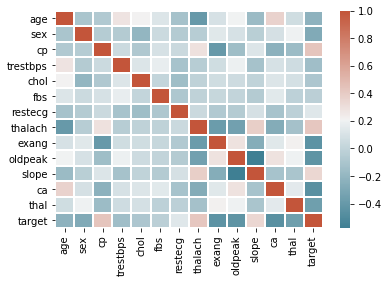

In [ ]:
#plot the heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Feature Selection 

When it comes to our continuous variables we see the distributions appear largely the same. There have been no serious changes to the distribution of these values. As there were no changes to the numeric values during the data preparation stage.

A quick look at the correlation Heatmap shows us that next to none of our numerical or categorical variables are correlate. This means all of the numerical variables have value for predictive purposes. As we are working with a small dataset with just 303 observations. It may be best to avoid removing any of the continuous numerical variables during feature selection. 

As for our categorical variables, we will be using all of those as well. As they are all uniques values that relate to heart health and therefore will serve us well in modeling purposes.

The reason for us avoiding feature selection is simple. We are working on a limited data set with only 303 rows. As such we should not be eliminating exploratory variables unless absolutely necessary.

This means that we do not need to perform Recursive Feature Elimination, Chi-Square Test, or any other feature selection process. 

## Feature Scaling

For our feature scaling, we chose a standard scaler for all of our continuous numerical variables. The StandardScaler removes the mean and scales the data.

We will also be providing results for all the same models run using the MinMaxScaler for comparison purposes. This comparison will be available in the model selection section,

For our Categorical varaibles. With the exception of our response variable 'fbs' we used one-hot encoding. One hot encoding allows us to use categorical variables as binary vectors with each value represented by a zero except the index of the integer, which is marked with a 1.

https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely

In [ ]:
#Scale our Continous data using StandardScaler
scaled = StandardScaler().fit_transform(df[cont]) 

#One Hot encode the catecorical variables
one_hot = OneHotEncoder(sparse = False).fit_transform(df[cat])

#Set up your explorotory variables in a datframe
X = np.concatenate([scaled, one_hot], axis = 1)

#Seperate your response variable
y = df['fbs']


Our X variable contains all of our exploratory variables. While our y variable contains our response variable.

In [ ]:
y=y.astype('int')

In [ ]:
from imblearn.over_sampling import SMOTE
#Fix Class imbalances
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


As mentioned earlier we have some imbalanced classes that need to be dealt with. We will be applying SMOTE here to resolve this issue. This will help us especially with our response variable as values with 'Fasting Blood Sugar' over 120 milligrams per liter are quite underrepresented in our data set.

## Machine Learning Modles

In [ ]:
#Split the data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)

Split the data into Training and Test sets.

In [ ]:
# Create empty lists for model Metrics

precision = []
accuracy = []
recall = []
f1_scores = []
auc =[]
cross_validation_score =[]

In [ ]:
# Create empty data frame for model Metrics
overview = pd.DataFrame()
overview[''] = ['Random Forest1','Random Forest2','Random Forest3', 'Decision Tree1','Decision Tree2','Decision Tree3', 'KNN1','KNN2','KNN3', 'XG Boost1','XG Boost2','XG Boost3']


In [ ]:
# Create second empty data frame for model Metrics
overview2 = pd.DataFrame()
overview2[''] = ['Random Forest1','Random Forest2','Random Forest3', 'Decision Tree1','Decision Tree2','Decision Tree3', 'KNN1','KNN2','KNN3', 'XG Boost1','XG Boost2','XG Boost3','Ensamble_model']

These empty lists will be used for reviewing all our model results. We will be appending data to these lists as we return results from each model. We will then show all these results in the data frames 'overview' and 'overview2' once our modeling is complete.

Random Forest 1

We ran three Random Forest clasifiers. 

clf = RandomForestClassifier( n_estimators=1000, max_leaf_nodes=16, random_state=35,max_depth=2)

clf2 = RandomForestClassifier( n_estimators=800, max_leaf_nodes=12, random_state=35,max_depth=2)

clf3 = RandomForestClassifier(n_estimators=1500, max_leaf_nodes=18, random_state=35,max_depth=2)

Each of these models contains diffrent values for n_estimators and max_lead_nodes. All of these models yielded differing results. On our final run clf yielded the best results.

Precision-0.784314,	

Accuracy-0.807692,	

Recall-0.816327,	

F1_score-0.800000,	

auc_score-0.808163,	

Mean Cross Val Score-0.757085



In [ ]:
#Train and fit your classifier
clf = RandomForestClassifier( n_estimators=1000, max_leaf_nodes=16, random_state=35,max_depth=2)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=35, verbose=0,
                       warm_start=False)

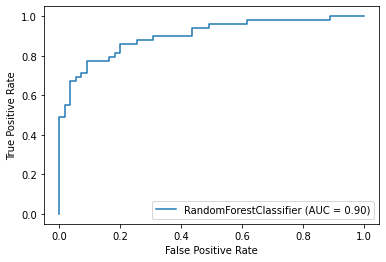

In [ ]:
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
y_pred_clf = clf.predict(X_test)

print(scores.mean())
print(confusion_matrix(y_test,y_pred_clf))
print(classification_report(y_test,y_pred_clf))

0.7570847851335656
[[44 11]
 [ 9 40]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        55
           1       0.78      0.82      0.80        49

    accuracy                           0.81       104
   macro avg       0.81      0.81      0.81       104
weighted avg       0.81      0.81      0.81       104



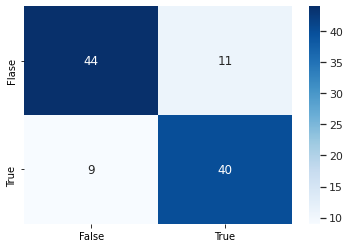

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_clf)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_clf)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_clf)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_clf)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_clf)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_clf)))
cross_validation_score.append(scores.mean())


Random Forest 2

In [ ]:
#Train and fit your classifier
clf2 = RandomForestClassifier( n_estimators=800, max_leaf_nodes=12, random_state=35,max_depth=2)

clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=12, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=35, verbose=0,
                       warm_start=False)

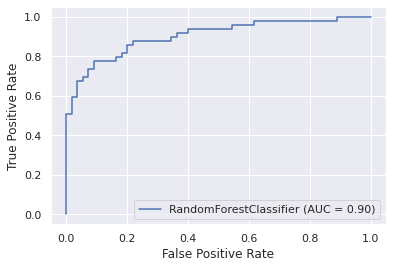

In [ ]:
metrics.plot_roc_curve(clf2, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(clf2, X_train, y_train, cv=10, scoring='accuracy')
y_pred_clf2 = clf2.predict(X_test)

print(scores.mean())
print(confusion_matrix(y_test,y_pred_clf2))
print(classification_report(y_test,y_pred_clf2))

0.7546457607433217
[[44 11]
 [ 9 40]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        55
           1       0.78      0.82      0.80        49

    accuracy                           0.81       104
   macro avg       0.81      0.81      0.81       104
weighted avg       0.81      0.81      0.81       104



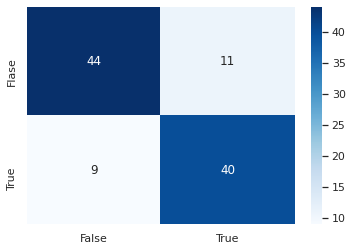

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_clf2)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_clf2)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_clf2)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_clf2)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_clf2)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_clf2)))
cross_validation_score.append(scores.mean())


Random Forest 3

In [ ]:
#Train and fit your classifier
clf3 = RandomForestClassifier(n_estimators=1500, max_leaf_nodes=18, random_state=35,max_depth=2)

clf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=18, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=35, verbose=0,
                       warm_start=False)

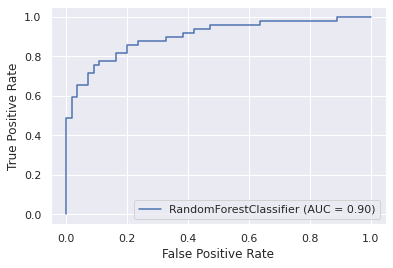

In [ ]:
metrics.plot_roc_curve(clf3, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(clf3, X_train, y_train, cv=10, scoring='accuracy')
y_pred_clf3 = clf3.predict(X_test)

print(scores.mean())
print(confusion_matrix(y_test,y_pred_clf3))
print(classification_report(y_test,y_pred_clf3))

0.7498257839721254
[[44 11]
 [ 9 40]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        55
           1       0.78      0.82      0.80        49

    accuracy                           0.81       104
   macro avg       0.81      0.81      0.81       104
weighted avg       0.81      0.81      0.81       104



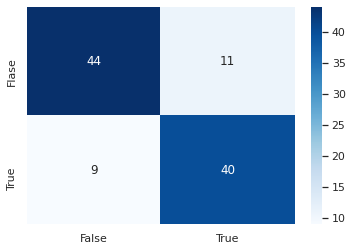

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_clf3)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_clf3)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_clf3)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_clf3)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_clf3)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_clf3)))
cross_validation_score.append(scores.mean())


Decision Tree 1

We ran three Decision Tree's. 

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=35)

dt_clf2 = DecisionTreeClassifier(max_depth=10, random_state=35)

dt_clf3 = DecisionTreeClassifier(max_depth=15, random_state=35)

Each of these models contains diffrent values for max_depth. All of these models yielded differing results. On our final run dt_clf3 yielded the best results.
					
Precision-0.789474,	

Accuracy-0.846154,	

Recall-0.918367,	

F1_score-0.849057,	

auc_score-0.850093,	

Mean Cross Val Score-0.806156

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Train and fit your classifier
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=35)
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=35, splitter='best')

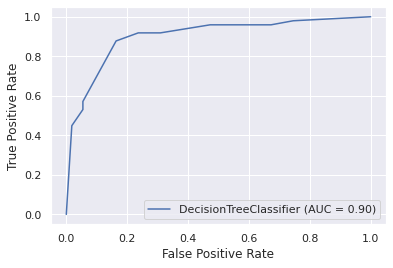

In [ ]:
metrics.plot_roc_curve(dt_clf, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(dt_clf, X_train, y_train, cv=10, scoring='accuracy')
y_pred_dt_clf = dt_clf.predict(X_test)


In [ ]:
print(scores.mean())
print(confusion_matrix(y_test,y_pred_dt_clf))
print(classification_report(y_test,y_pred_dt_clf))

0.7547038327526132
[[42 13]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        55
           1       0.78      0.92      0.84        49

    accuracy                           0.84       104
   macro avg       0.84      0.84      0.84       104
weighted avg       0.85      0.84      0.84       104



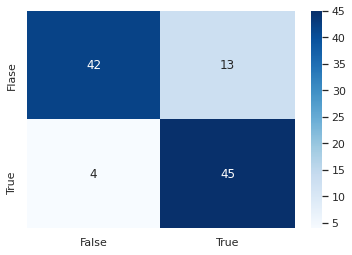

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt_clf)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_dt_clf)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_dt_clf)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_dt_clf)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_dt_clf)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_dt_clf)))
cross_validation_score.append(scores.mean())

Decision Tree 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Train and fit your classifier
dt_clf2 = DecisionTreeClassifier(max_depth=10, random_state=35)
dt_clf2.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=35, splitter='best')

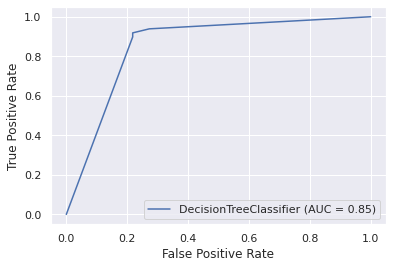

In [ ]:
metrics.plot_roc_curve(dt_clf2, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(dt_clf2, X_train, y_train, cv=10, scoring='accuracy')
y_pred_dt_clf2 = dt_clf2.predict(X_test)


In [ ]:
print(scores.mean())
print(confusion_matrix(y_test,y_pred_dt_clf2))
print(classification_report(y_test,y_pred_dt_clf2))

0.8012775842044135
[[43 12]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        55
           1       0.79      0.92      0.85        49

    accuracy                           0.85       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.86      0.85      0.85       104



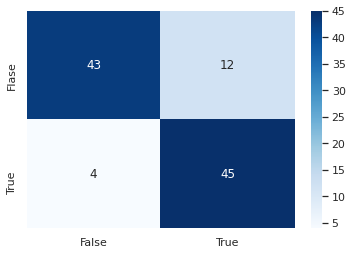

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt_clf2)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_dt_clf2)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_dt_clf2)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_dt_clf2)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_dt_clf2)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_dt_clf2)))
cross_validation_score.append(scores.mean())

Decision Tree 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Train and fit your classifier
dt_clf3 = DecisionTreeClassifier(max_depth=15, random_state=35)
dt_clf3.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=35, splitter='best')

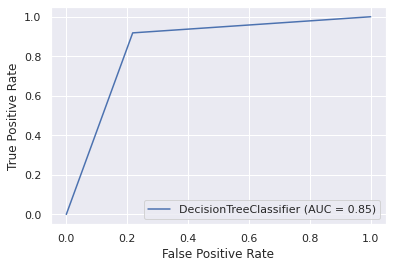

In [ ]:
metrics.plot_roc_curve(dt_clf3, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(dt_clf3, X_train, y_train, cv=10, scoring='accuracy')
y_pred_dt_clf3 = dt_clf3.predict(X_test)


In [ ]:
print(scores.mean())
print(confusion_matrix(y_test,y_pred_dt_clf3))
print(classification_report(y_test,y_pred_dt_clf3))

0.8061556329849013
[[43 12]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        55
           1       0.79      0.92      0.85        49

    accuracy                           0.85       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.86      0.85      0.85       104



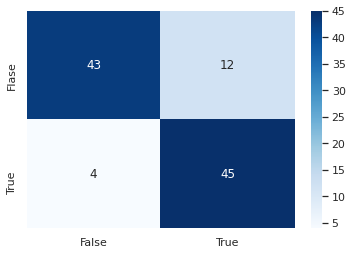

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt_clf3)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_dt_clf3)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_dt_clf3)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_dt_clf3)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_dt_clf3)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_dt_clf3)))
cross_validation_score.append(scores.mean())

K-nearest Neighbor 1

We ran three K-nearest neighbor models. 

knn = KNeighborsClassifier(n_neighbors = 5)

knn2 = KNeighborsClassifier(n_neighbors = 10)

knn3 = KNeighborsClassifier(n_neighbors = 15)

Each of these models contains diffrent values for n_neighbors. All of these models yielded differing results. On our final run Knn yielded the best results.
										
Precision-0.777778,	

Accuracy-0.865385,	

Recall-1.000000,	

F1_score-0.875000,	

auc_score-0.872727,	

Mean Cross Val Score-0.742567

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Train and fit your classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

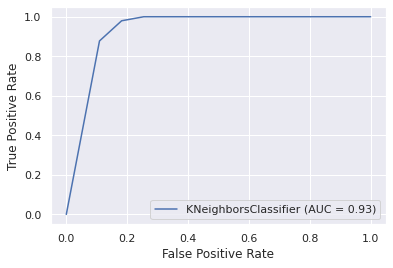

In [ ]:
metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
y_pred_knn = knn.predict(X_test)

In [ ]:
print(scores.mean())
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

0.7425667828106851
[[41 14]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.85        55
           1       0.78      1.00      0.88        49

    accuracy                           0.87       104
   macro avg       0.89      0.87      0.86       104
weighted avg       0.90      0.87      0.86       104



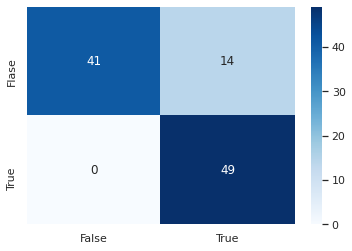

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_knn)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_knn)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_knn)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_knn)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_knn)))
cross_validation_score.append(scores.mean())

K-nearest Neighbor 2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Train and fit your classifier
knn2 = KNeighborsClassifier(n_neighbors = 10)
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

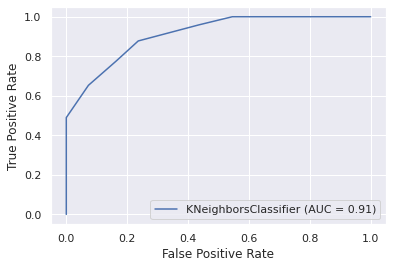

In [ ]:
metrics.plot_roc_curve(knn2, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(knn2, X_train, y_train, cv=10, scoring='accuracy')
y_pred_knn2 = knn2.predict(X_test)

In [ ]:
print(scores.mean())
print(confusion_matrix(y_test,y_pred_knn2))
print(classification_report(y_test,y_pred_knn2))

0.7014518002322879
[[31 24]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.94      0.56      0.70        55
           1       0.66      0.96      0.78        49

    accuracy                           0.75       104
   macro avg       0.80      0.76      0.74       104
weighted avg       0.81      0.75      0.74       104



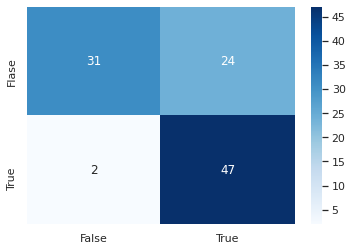

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn2)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_knn2)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_knn2)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_knn2)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_knn2)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_knn2)))
cross_validation_score.append(scores.mean())

K-nearest Neighbor 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Train and fit your classifier
knn3 = KNeighborsClassifier(n_neighbors = 15)
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

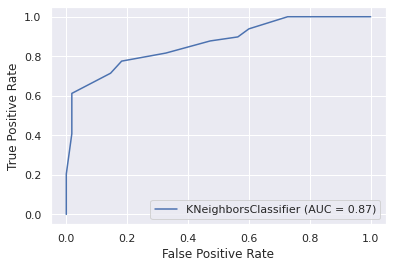

In [ ]:
metrics.plot_roc_curve(knn3, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(knn3, X_train, y_train, cv=10, scoring='accuracy')
y_pred_knn3 = knn3.predict(X_test)

In [ ]:
print(scores.mean())
print(confusion_matrix(y_test,y_pred_knn3))
print(classification_report(y_test,y_pred_knn3))

0.6505226480836236
[[24 31]
 [ 5 44]]
              precision    recall  f1-score   support

           0       0.83      0.44      0.57        55
           1       0.59      0.90      0.71        49

    accuracy                           0.65       104
   macro avg       0.71      0.67      0.64       104
weighted avg       0.71      0.65      0.64       104



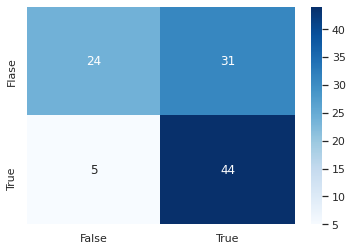

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn3)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_knn3)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_knn3)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_knn3)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_knn3)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_knn3)))
cross_validation_score.append(scores.mean())

XG Boost 1

We ran three XG Boosted models. 

xgb = XGBClassifier(max_depth= 8, n_estimators= 150, random_state= 35,  learning_rate= 0.02, n_jobs=5)

xgb2 = XGBClassifier(max_depth= 5, n_estimators= 100, random_state= 35,  learning_rate= 0.03, n_jobs=5)

xgb3 = XGBClassifier(max_depth= 15, n_estimators= 200, random_state= 35,  learning_rate= 0.02, n_jobs=5)

These models contains diffrent values for max_depth, n_estimators, and learning_rate. All of these models yielded differing results. On our final run xgb3 yielded the best results.
					
Precision-0.914894,	

Accuracy-0.903846,	

Recall-0.877551,	

F1_score-0.895833,	

auc_score-0.902412,	

Mean Cross Val Score-0.893322

In [ ]:
#Train and fit your classifier
xgb = XGBClassifier(max_depth= 8, n_estimators= 150, random_state= 35,  learning_rate= 0.02, n_jobs=5)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=5,
              nthread=None, objective='binary:logistic', random_state=35,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

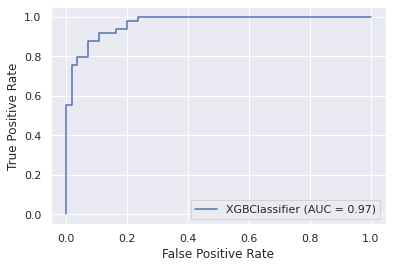

In [ ]:
metrics.plot_roc_curve(xgb, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring='accuracy')
y_pred_xgb = xgb.predict(X_test)

print(scores.mean())
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

0.8861207897793264
[[50  5]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        55
           1       0.90      0.88      0.89        49

    accuracy                           0.89       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.89      0.89      0.89       104



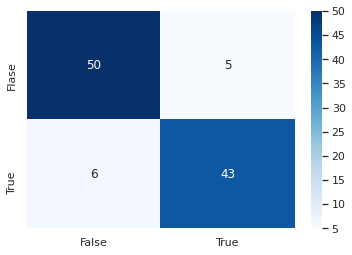

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_xgb)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_xgb)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_xgb)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_xgb)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_xgb)))
cross_validation_score.append(scores.mean())

XG Boost 2

In [ ]:
#Train and fit your classifier
xgb2 = XGBClassifier(max_depth= 5, n_estimators= 100, random_state= 35,  learning_rate= 0.03, n_jobs=5)

xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=5,
              nthread=None, objective='binary:logistic', random_state=35,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

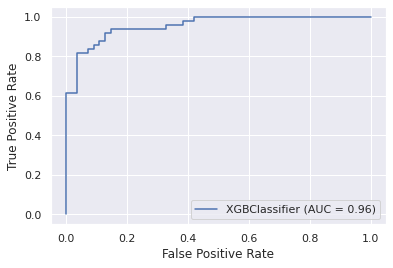

In [ ]:
metrics.plot_roc_curve(xgb2, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(xgb2, X_train, y_train, cv=10, scoring='accuracy')
y_pred_xgb2 = xgb2.predict(X_test)

print(scores.mean())
print(confusion_matrix(y_test,y_pred_xgb2))
print(classification_report(y_test,y_pred_xgb2))

0.8763066202090594
[[49  6]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        55
           1       0.88      0.88      0.88        49

    accuracy                           0.88       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.88      0.88      0.88       104



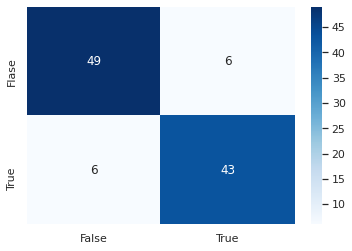

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb2)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_xgb2)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_xgb2)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_xgb2)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_xgb2)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_xgb2)))
cross_validation_score.append(scores.mean())

XG Boost 3

In [ ]:
#Train and fit your classifier
xgb3 = XGBClassifier(max_depth= 15, n_estimators= 200, random_state= 35,  learning_rate= 0.02, n_jobs=5)

xgb3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=5,
              nthread=None, objective='binary:logistic', random_state=35,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

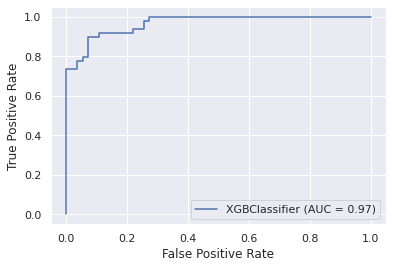

In [ ]:
metrics.plot_roc_curve(xgb3, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(xgb3, X_train, y_train, cv=10, scoring='accuracy')
y_pred_xgb3 = xgb3.predict(X_test)

print(scores.mean())
print(confusion_matrix(y_test,y_pred_xgb3))
print(classification_report(y_test,y_pred_xgb3))

0.8933217189314752
[[51  4]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        55
           1       0.91      0.88      0.90        49

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.90      0.90      0.90       104



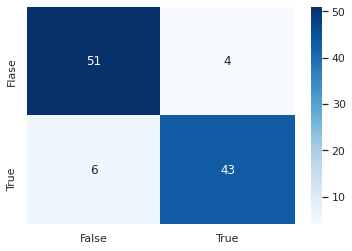

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb3)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_xgb3)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_xgb3)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_xgb3)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_xgb3)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_xgb3)))
cross_validation_score.append(scores.mean())

## Model Selection

As Stated above we have isolated the best performing models for each of our four model types. Our Best Random Forest model is 'clf'. Our best Decision Tree is 'dt_clf3'. Our best K-nearest neighbors model was 'Knn'. Finally, our best XG Boosted model was 'xgb3'.

Of the four best models of each model type 'xgb3' was selected as our preferred model as it yielded the best results.

Precision-0.914894,

Accuracy-0.903846,

Recall-0.877551,

F1_score-0.895833,

auc_score-0.902412,

Mean Cross Val Score-0.893322

In [ ]:
#Show an overview of all model's performance
overview['Precision'] = precision
overview['Accuracy'] = accuracy
overview['Recall'] = recall
overview['F1_score'] = f1_scores
overview['auc_score'] = auc
overview['Mean Cross Val Score'] = cross_validation_score

overview

,,Precision,Accuracy,Recall,F1_score,auc_score,Mean Cross Val Score
0,Random Forest1,0.784314,0.807692,0.816327,0.800000,0.808163,0.757085
1,Random Forest2,0.784314,0.807692,0.816327,0.800000,0.808163,0.754646
2,Random Forest3,0.784314,0.807692,0.816327,0.800000,0.808163,0.749826
3,Decision Tree1,0.775862,0.836538,0.918367,0.841121,0.841002,0.754704
4,Decision Tree2,0.789474,0.846154,0.918367,0.849057,0.850093,0.801278
5,Decision Tree3,0.789474,0.846154,0.918367,0.849057,0.850093,0.806156
6,KNN1,0.777778,0.865385,1.000000,0.875000,0.872727,0.742567
7,KNN2,0.661972,0.750000,0.959184,0.783333,0.761410,0.701452
8,KNN3,0.586667,0.653846,0.897959,0.709677,0.667161,0.650523
9,XG Boost1,0.895833,0.894231,0.877551,0.886598,0.893321,0.886121


For comparison purposes, the same data frame was generated for all of the same models. With the exception being the data was scaled using MinMaxSclaler() instead of StandardScaler(). The notable differences are that the Random Forest models and the Decision Tree's perform better using the MinMaxScaler. The K-nearest neighbor and XG Boosted models on the other hand seem to work better with the StandardScaler.

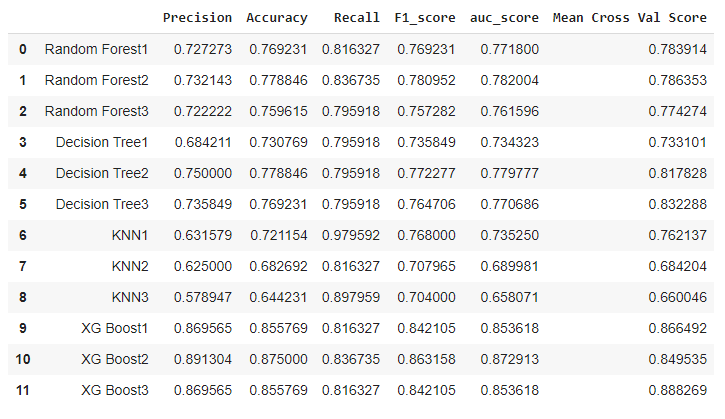

In [ ]:
#Run our preferred model on the test set
y_pred = xgb3.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['fbs'])
y_test = pd.DataFrame(y_test, columns=['fbs'])



As we have decided that 'xgb3' is our best model. We shall be running it against the test set to confirm how well our preferred model runs overall. The bar charts show the predictions of our preferred model the 'xgb3' against the test set. The results are fairly decent. However, there is a notable discrepancy between the prediction and our test data. Implying that our model while efficient does have errors in it.

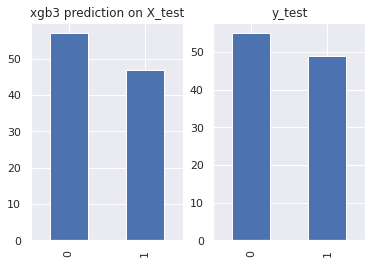

In [ ]:
#Create the bar plots for the model run on the test set
plt.subplot(1,2,1)
y_pred.fbs.value_counts().plot(kind='bar');
plt.title('xgb3 prediction on X_test')

plt.subplot(1,2,2)
y_test.fbs.value_counts().plot(kind='bar');
plt.title('y_test')
plt.show();

plt.show()

## Ensamble Modle

Our ensemble model was built using Stacking. We stacked our four best models for each model type we ran. The Stacking was done using the Sklearn StackingClassifier. Our final classifier is a logistic regression and uses the predicted values of these four models to inform its own predictions. By using the predicted values of our previous models as input to a new model the new model will optimally combine the model predictions to form a new set of predictions.

This ensemble model outperforms all of our other models for all metrics except Cross-Validation.
					
Precision-0.920000,

Accuracy-0.932692,

Recall-0.938776,

F1_score-0.929293,

auc_score-0.933024,

Mean Cross Val Score-0.883391


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

In [ ]:
#Stacking
Stacking = [('clf', clf),('dt_clf3', dt_clf),('knn', knn),('xgb3', xgb)]

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

#train the ensemble model
ensemble = StackingClassifier(estimators=Stacking, final_estimator=LogisticRegression())
ensemble.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('clf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=2,
                                                       max_features='auto',
                                                       max_leaf_nodes=16,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                         

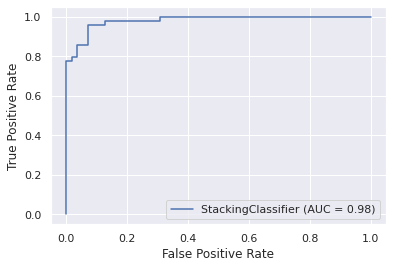

In [ ]:
metrics.plot_roc_curve(ensemble, X_test, y_test)
plt.show()

In [ ]:
scores = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='accuracy')
y_pred_ensemble = ensemble.predict(X_test)

print(scores.mean())
print(confusion_matrix(y_test,y_pred_ensemble))
print(classification_report(y_test,y_pred_ensemble))

0.8833914053426248
[[51  4]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.92      0.94      0.93        49

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104



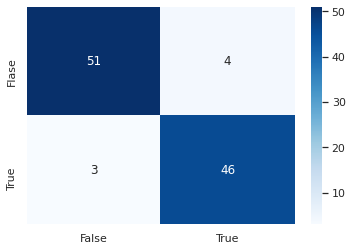

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
ax = plt.subplot()
sns.set(font_scale=1.0) 
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");

# labels, title and ticks
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['Flase', 'True']);
plt.show()

In [ ]:
# Store metrics in previously created empty lists
precision.append(np.mean(metrics.precision_score(y_test,y_pred_ensemble)))
accuracy.append(np.mean(metrics.accuracy_score(y_test,y_pred_ensemble)))
recall.append(np.mean(metrics.recall_score(y_test,y_pred_ensemble)))
f1_scores.append(np.mean(metrics.f1_score(y_test,y_pred_ensemble)))
auc.append(np.mean(metrics.roc_auc_score(y_test,y_pred_ensemble)))
cross_validation_score.append(scores.mean())

In [ ]:
#Show an overview of all model's performance including ensemble model
overview2['Precision'] = precision
overview2['Accuracy'] = accuracy
overview2['Recall'] = recall
overview2['F1_score'] = f1_scores
overview2['auc_score'] = auc
overview2['Mean Cross Val Score'] = cross_validation_score

overview2

,,Precision,Accuracy,Recall,F1_score,auc_score,Mean Cross Val Score
0,Random Forest1,0.784314,0.807692,0.816327,0.800000,0.808163,0.757085
1,Random Forest2,0.784314,0.807692,0.816327,0.800000,0.808163,0.754646
2,Random Forest3,0.784314,0.807692,0.816327,0.800000,0.808163,0.749826
3,Decision Tree1,0.775862,0.836538,0.918367,0.841121,0.841002,0.754704
4,Decision Tree2,0.789474,0.846154,0.918367,0.849057,0.850093,0.801278
5,Decision Tree3,0.789474,0.846154,0.918367,0.849057,0.850093,0.806156
6,KNN1,0.777778,0.865385,1.000000,0.875000,0.872727,0.742567
7,KNN2,0.661972,0.750000,0.959184,0.783333,0.761410,0.701452
8,KNN3,0.586667,0.653846,0.897959,0.709677,0.667161,0.650523
9,XG Boost1,0.895833,0.894231,0.877551,0.886598,0.893321,0.886121


## Conclusion

Abstract
In summary, We had two columns with mislabeled variables that needed to be dropped and replaced using a k-nearest neighbor. Our 'xgb3' model outperformed all other models. 
Our 'xgb3' model performed modestly well on the X_test data.
Our Ensemble model outperformed all our other models on every metric except for cross-validation.



***Research Question:*** Can we effectively predict if Fasting Blood Sugar is over 120 mg/dl (milligrams per liter ) for heart attack patients with a Model performance, Precision, Accuracy, Recall, and F1-score of over 80%?

***Answer:*** Yes, we can effectively predict if Fasting Blood Sugar is over 120 mg/dl for heart attack patients with Precision, Accuracy, Recall, and F1-score of over 80%. In fact, using our ensemble model we could possibly reach over 90%. 

This means we can tell patients with reasonable certainty that blood sugar levels played a role in their heart attack.

As for future extensions of this project I have a few in mind. I had originally intended to include an SVM and Neural Network in this project. I would like to see how the ensemble model would perform on six models outputs. In addition, I had intended to do another ensemble model using Bagging. It would be nice to see a comparison of the outputs of the two different ensemble models.

https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843

https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/

https://seaborn.pydata.org/generated/seaborn.catplot.html

https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely

https://stackoverflow.com/questions/63673517/how-can-i-fix-the-value-error-issue-tensorflow

https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c

https://scikit-learn.org/stable/modules/ensemble.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

https://stackoverflow.com/questions/59839782/confusion-matrix-font-size

https://www.jeremyjordan.me/evaluating-a-machine-learning-model/